# DoubleMovingAverage (DMA)

In [1]:
# still using maotai's stock history

import pandas as pd

df = pd.read_csv('maotai.csv').drop(labels = 'Unnamed: 0', axis = 1)
df

,date,open,close,high,low,volume,code
0,2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
1,2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2,2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
3,2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
4,2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519
...,...,...,...,...,...,...,...
5085,2022-12-01,1660.000,1630.800,1680.000,1630.790,51358.00,600519
5086,2022-12-02,1635.000,1633.880,1652.990,1621.200,23884.00,600519
5087,2022-12-05,1668.000,1664.900,1679.000,1649.000,36127.00,600519
5088,2022-12-06,1655.000,1688.000,1726.900,1652.000,44147.00,600519


In [2]:
df['date'] = pd.to_datetime(df['date']) # change the type of 'date' to date type

In [3]:
df.set_index('date',inplace=True) # reset the index as 'date'

In [4]:
df

,open,close,high,low,volume,code
date,,,,,,
2001-08-27,-113.034,-112.849,-112.453,-113.329,406318.00,600519
2001-08-28,-112.949,-112.616,-112.591,-113.016,129647.79,600519
2001-08-29,-112.595,-112.702,-112.591,-112.751,53252.75,600519
2001-08-30,-112.719,-112.574,-112.501,-112.769,48013.06,600519
2001-08-31,-112.565,-112.590,-112.481,-112.627,23231.48,600519
...,...,...,...,...,...,...
2022-12-01,1660.000,1630.800,1680.000,1630.790,51358.00,600519
2022-12-02,1635.000,1633.880,1652.990,1621.200,23884.00,600519
2022-12-05,1668.000,1664.900,1679.000,1649.000,36127.00,600519


- MA = (C1+C2+...+Cn)/N (C is the closing price, N is the moving days)

In [5]:
ma5= df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()

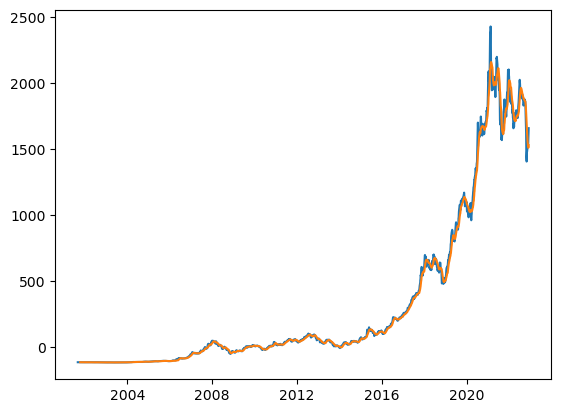

In [6]:
import matplotlib.pyplot as plt
plt.plot(ma5)
plt.plot(ma30)

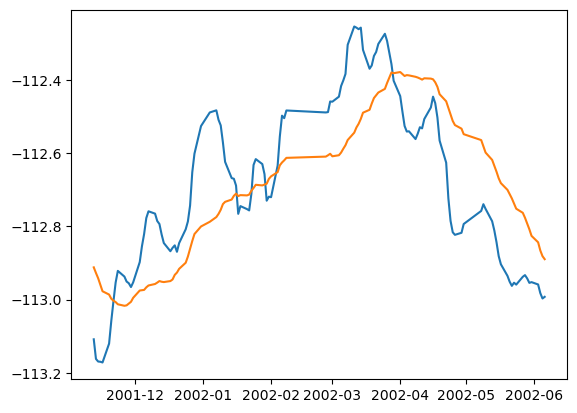

In [7]:
plt.plot(ma5[50:180])
plt.plot(ma30 [50:180])

## Crossing point

- Gold crossing: short MA increasing and across long MA, take long side
- Dead crossing: short MA decreasing and across long MA, take short side

In [8]:
ma5 = ma5[30:]
ma30 = ma30[30:]

In [9]:
s1 = ma5<ma30

In [10]:
s2 = ma5>ma30

In [11]:
df = df[30:]

In [12]:
# dead crossing:
death_cross =  s1 & s2.shift(1) 

In [13]:
df.loc[death_cross]

,open,close,high,low,volume,code
date,,,,,,
2002-01-17,-112.734,-112.936,-112.682,-113.000,24180.31,600519
2002-01-30,-112.840,-112.844,-112.719,-112.911,8419.22,600519
2002-03-29,-112.414,-112.545,-112.405,-112.574,10625.47,600519
2002-07-29,-112.765,-112.865,-112.750,-112.886,2557.48,600519
2002-12-27,-114.038,-114.008,-113.983,-114.073,3390.21,600519
...,...,...,...,...,...,...
2021-11-04,1756.265,1782.525,1794.325,1747.745,31130.00,600519
2022-01-06,2000.335,1960.545,2014.325,1916.835,51795.00,600519
2022-05-13,1758.325,1756.565,1776.265,1744.325,20731.00,600519


In [14]:
death_crossing_date = df.loc[death_cross].index

In [15]:
death_crossing_date

DatetimeIndex(['2002-01-17', '2002-01-30', '2002-03-29', '2002-07-29',
               '2002-12-27', '2003-03-17', '2003-04-22', '2003-06-20',
               '2003-06-30', '2003-08-04',
               ...
               '2020-10-27', '2021-03-01', '2021-04-15', '2021-05-06',
               '2021-06-22', '2021-11-04', '2022-01-06', '2022-05-13',
               '2022-07-21', '2022-10-10'],
              dtype='datetime64[ns]', name='date', length=107, freq=None)

In [16]:
gold_cross =  -(s1 | s2.shift(1)) 

In [17]:
gold_crossing_date = df.loc[gold_cross].index

In [18]:
gold_crossing_date

DatetimeIndex(['2001-11-22', '2002-01-24', '2002-02-04', '2002-06-21',
               '2002-12-05', '2003-01-16', '2003-04-15', '2003-05-30',
               '2003-06-24', '2003-07-14',
               ...
               '2020-11-05', '2021-04-02', '2021-04-16', '2021-05-20',
               '2021-09-16', '2021-11-23', '2022-04-07', '2022-06-02',
               '2022-09-29', '2022-11-18'],
              dtype='datetime64[ns]', name='date', length=108, freq=None)

## Problem:

If you follow the follow the gold crossing buy, death crossing sell since 2010 until 2020, assume you cannot buy fraction of a share, with start capital = $100,000. How's your gain?

- use opening price for buying and selling
- assume you may remain stocks on hand at the end (using closing price)

In [35]:
from pandas import Series
s1 = Series(data=1, index= gold_crossing_date)
s2 = Series(data=0, index= death_crossing_date)
s = pd.concat([s1, s2])
s = s.sort_index()
s = s['2010':'2020']
s 

date
2010-01-20    1
2010-01-22    0
2010-02-03    1
2010-02-26    0
2010-06-04    1
             ..
2020-08-19    1
2020-09-21    0
2020-10-14    1
2020-10-27    0
2020-11-05    1
Length: 115, dtype: int64

In [48]:
principal = 100000
spend = principal
shares = 0

for i in range(0,len(s)):
    if s[i]==1:
        time = s.index[i]
        p = df.loc[time]['open']
        count = spend//(p*100) 
        shares = count*100
        principal -= (shares*p)
    else:
        deathTime = s.index[i]
        p_death = df.loc[deathTime]['open']
        principal += (p_death*shares)
        shares = 0
        
    remain = shares*df['close'][-1]
    
print(principal+remain-spend)

957317.5000000002
